<div style="border: 5px solid blue; padding: 20px;">

<span style="font-family: 'Arial';">
    <span style="color: 008000;"> Recreate Figure 5 from Kopp et al  
    <a href="https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017EF000663/"<strong>2017</strong></a> 
    </span>.
</span>

---
</div>

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from mpl_toolkits.basemap import Basemap
import glob
import os
import shutil
import re
import cartopy
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#
%matplotlib inline
# %matplotlib notebook
#
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, BoundaryNorm
#
# PD=os.getcwd(); PD


<div style="border: 2px solid black; border-bottom: none; padding: 20px;">


<span style="font-family: 'Times New Roman'; font-size: 32px; color: #FF0000;">FACTS paper data</span>

---

<span style="font-family: 'Arial';">
    Use data from the <a href="https://egusphere.copernicus.org/preprints/2023/egusphere-2023-14/"><strong>facts paper</strong></a> 
    <span style="color: 008000;"> to create Figure 5 from Kopp et al 
    <a href="https://egusphere.copernicus.org/preprints/2023/egusphere-2023-14/"<strong>2017</strong></a>
    </span>.
</span>


</div>

<span style="font-family: 'Times New Roman'; font-size: 17px; color: #0000FF;">
    Load the data from latest EXP
</span>

In [2]:
# exp=221217   #221209  #221217
# filename="coupling.ssp585.ar5AIS.ipccar5.icesheets_AIS_globalsl.nc"
# path="/projects/kopp/facts-experiments/{arg0}/coupling.ssp585/output/".format(arg0=exp)
# fileP=(path+filename)
# nc=xr.open_dataset(fileP)
# # nc

In [3]:
# # Get all the *.nc file names (can use OPloopdir[n])
# nclist=os.listdir(path+'/');  nclist=sorted(nclist)
# nclist_local=[]
# for ncname in nclist:
#     if 'global' in ncname:
#         nclist_local.append(ncname) 
# nclist_local

<div style="border: 2px solid black; border-bottom: none; padding: 20px;">


<span style="font-family: 'Times New Roman'; font-size: 32px; color: #FF0000;">
Data from 2023-06 Facts 1.0 run</span>

---

<span style="font-family: 'Arial';">
    
</span>


</div>

In [4]:
# path="/projects/kopp/ar6/global/full_sample_components/"
# #
# # Get all the *.nc file names (can use OPloopdir[n])
# nclist=os.listdir(path+'/');  nclist=sorted(nclist)
# nclist_local=[]
# for ncname in nclist:
#     if 'global' in ncname:
#         nclist_local.append(ncname) 
# #nclist_local

<span style="font-family: 'Times New Roman'; font-size: 17px; color: #0000FF;">
    Open the AIS data from K14 and DP16 runs done on 0614
</span>

In [5]:
exp='coupling.ssp585.20k'
#
nc1_nme="/scratch/pk695/FACTS/002_fork/facts/experiments.TEST/exp_k14/{arg1}/output/{arg1}.deconto16.deconto16.AIS_AIS_globalsl.nc".format(arg1=exp)
nc1=xr.open_dataset(nc1_nme);
nc1_nme1=nc1_nme.split("/")[10].split("coupling")[1]
#
nc2_nme="/scratch/pk695/FACTS/002_fork/facts/experiments.TEST/exp_k14/{arg1}/output/{arg1}.k14ice.kopp14.icesheets_AIS_globalsl.nc".format(arg1=exp)
nc2=xr.open_dataset(nc2_nme)
nc2_nme1=nc2_nme.split("/")[10].split("coupling")[1]
#
print("DATA nc1 =", nc1)
print("______________________________ \n",)
print("DATA nc2 =", nc2)

DATA nc1 = <xarray.Dataset>
Dimensions:           (years: 29, samples: 20000, locations: 1)
Coordinates:
  * years             (years) int32 2020 2030 2040 2050 ... 2270 2280 2290 2300
  * samples           (samples) int64 0 1 2 3 4 ... 19996 19997 19998 19999
  * locations         (locations) int64 -1
Data variables:
    lat               (locations) float32 ...
    lon               (locations) float32 ...
    sea_level_change  (samples, years, locations) float32 ...
Attributes:
    description:  Global SLR contribution from AIS according to DP16 workflow
    history:      Created Wed Jun 14 12:20:02 2023
    source:       FACTS: coupling.ssp585.20k.deconto16.deconto16.AIS - rcp85
______________________________ 

DATA nc2 = <xarray.Dataset>
Dimensions:           (years: 30, samples: 20000, locations: 1)
Coordinates:
  * years             (years) int32 2005 2020 2030 2040 ... 2270 2280 2290 2300
  * samples           (samples) int64 0 1 2 3 4 ... 19996 19997 19998 19999
  * locations 

In [6]:
# --- Other I/P choices.
# nc1_nme="icesheets-dp20-icesheet-ssp585_AIS_globalsl.nc"
# nc1=xr.open_dataset(path+nc1_nme);
# ---
# nc2_nme="icesheets-ar5-icesheets-ssp585_AIS_globalsl.nc"
# nc2_nme="icesheets-ipccar6-bambericesheet-ssp585_AIS_globalsl.nc"
# nc2=xr.open_dataset(path+nc2_nme); 
# nc2=xr.open_dataset(path+"icesheets-ipccar6-ismipemuicesheet-ssp585_AIS_globalsl.nc")
# ^-^

---

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
    ::Fn:: Indexing for specific/bin years
</span>

In [7]:
# Index for specific years
def idxY(year,Darray):
    """
    year=number like 2100
    Darray=array of years
    """
    yy=Darray == year
    idx=np.where(yy)[0] #use ~ 4FALSE.
    return idx




# Index for bin years
def idxYY(year1,year2,Darray):
    """
    year=number like 2100
    Darray=array of years
    """
    # yy=Darray >= year1 and Darray <= year2
    yy = np.logical_and(Darray >= year1, Darray <= year2)
    idx=np.where(yy)[0] #use ~ 4FALSE.
    return idx

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">

<span style="font-family: 'Times New Roman'; font-size: 17px; color: #0000FF;">
    PLOT F5
</span>

"\n# # Remove the x-axis from the first subplot\n# ax.tick_params(axis='x', bottom=False, labelbottom=False)\n\nx=np.arange(0,10)\ny=np.arange(10,20)\n\n# Plot scatter data on subplots in the second row and below\nfor i in range(1, 5):\n    ax = fig.add_subplot(gs[i, :])\n    ax.scatter(x, y, marker='o', edgecolor='black', linestyle='None', s=10, facecolor='black')\n    # ax.set_xlabel('X')\n    # ax.set_ylabel('Y')\n    # ax.set_title(f'Subplot {i+2}')\n#\nplt.subplots_adjust(wspace=0.35,hspace=1.4)\n# plt.tight_layout()\nplt.show()\n"

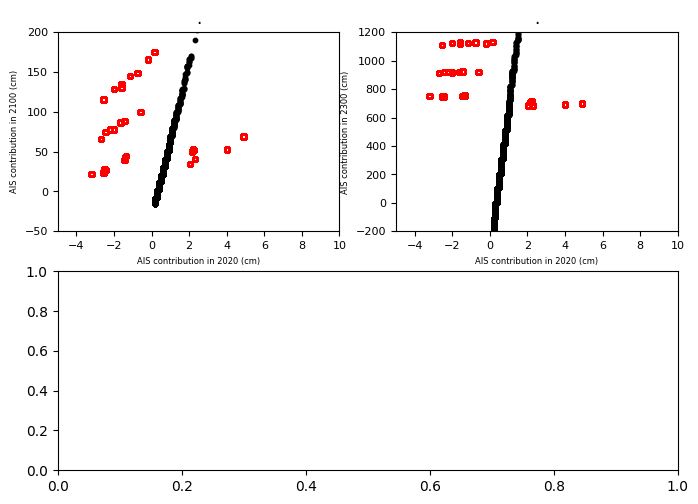

In [8]:
# unit=10
idx=idxY(2020,nc1.years.values)
X1=nc1.sea_level_change.values[:,idx,0]
x1=X1[:,:]/10

idx=idxY(2100,nc1.years.values)
Y1=nc1.sea_level_change.values[:,idx,0]
y1=Y1[:,:]/10

idx=idxY(2300,nc1.years.values)
Y11=nc1.sea_level_change.values[:,idx,0]
y11=Y11[:,:]/10

# -----------
idx=idxY(2020,nc2.years.values)
X2=nc2.sea_level_change.values[:,idx,0]
x2=X2[:,:]/10

idx=idxY(2100,nc2.years.values)
Y2=nc2.sea_level_change.values[:,idx,0]
y2=Y2[:,:]/10

idx=idxY(2300,nc2.years.values)
Y22=nc2.sea_level_change.values[:,idx,0]
y22=Y22[:,:]/10
# ____________________________________________________________


# Create a figure and gridspec
fig = plt.figure(figsize=(8, 15))
gs = gridspec.GridSpec(5, 2, figure=fig)

ax = fig.add_subplot(gs[0, 0])
ax.scatter(x1, y1, marker='s', edgecolor='red', linestyle='None', s=10, facecolor='none')
ax.scatter(x2, y2, marker='o', edgecolor='black', linestyle='None', s=10, facecolor='black')
ax.set_xlabel('AIS contribution in 2020 (cm)',fontsize=6)
ax.set_ylabel('AIS contribution in 2100 (cm)',fontsize=6)
ax.set_title('.')
ax.set_xlim(-5, 10); #ax.set_xlim(-5, 10) 
ax.set_ylim(-50, 200); #ax.set_ylim(-50, 200)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

ax = fig.add_subplot(gs[0, 1])
ax.scatter(x1, y11, marker='s', edgecolor='red', linestyle='None', s=10, facecolor='none')
ax.scatter(x2, y22, marker='o', edgecolor='black', linestyle='None', s=10, facecolor='black')
ax.set_xlabel('AIS contribution in 2020 (cm)',fontsize=6)
ax.set_ylabel('AIS contribution in 2300 (cm)',fontsize=6)
ax.set_title('.')
ax.set_xlim(-5, 10) 
ax.set_ylim(-200, 1200)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)



ax = fig.add_subplot(gs[1, :])
# ax.scatter(x1, y11, marker='s', edgecolor='red', linestyle='None', s=10, facecolor='none')
# ax.scatter(x2, y22, marker='o', edgecolor='black', linestyle='None', s=10, facecolor='black')
# ax.set_xlabel('AIS contribution in 2020 (cm)',fontsize=6)
# ax.set_ylabel('AIS contribution in 2300 (cm)',fontsize=6)
# ax.set_title('.')
# # ax.set_xlim(-5, 10) 
# # ax.set_ylim(-200, 1200)
# ax.tick_params(axis='x', labelsize=8)
# ax.tick_params(axis='y', labelsize=8)







'''
# # Remove the x-axis from the first subplot
# ax.tick_params(axis='x', bottom=False, labelbottom=False)

x=np.arange(0,10)
y=np.arange(10,20)

# Plot scatter data on subplots in the second row and below
for i in range(1, 5):
    ax = fig.add_subplot(gs[i, :])
    ax.scatter(x, y, marker='o', edgecolor='black', linestyle='None', s=10, facecolor='black')
    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')
    # ax.set_title(f'Subplot {i+2}')
#
plt.subplots_adjust(wspace=0.35,hspace=1.4)
# plt.tight_layout()
plt.show()
'''

<div style="border: 2px solid black; border-bottom: none; padding: 20px;">


<span style="font-family: 'Times New Roman'; font-size: 32px; color: #FF0000;">Figure 3</span>

---

<span style="font-family: 'Arial';">
    
</span>


</div>

In [9]:
# Colors
#
# Colors updated to match updated SPM colors
color_ssp245 = np.array([247 ,148,  32])/255
color_ssp370 = np.array([231 ,29 ,  37])/255
color_ssp585 = np.array([149 ,27 ,  30])/255

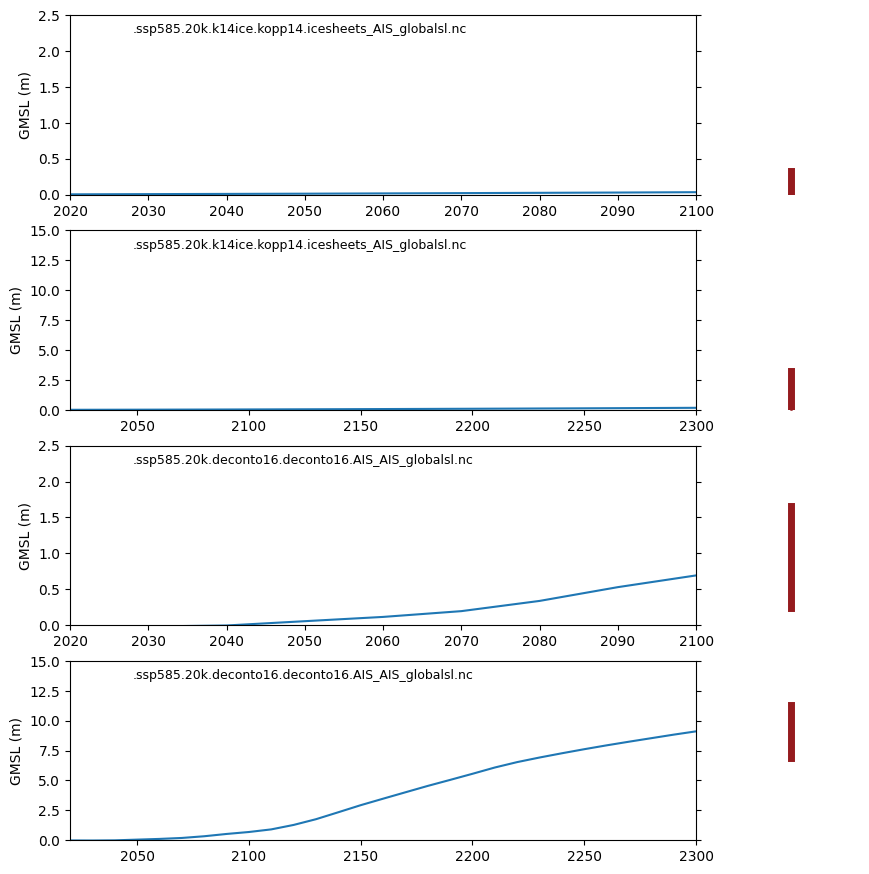

In [10]:
# Fig & Grid Spec
#
# Set global figure size and dots per inch
plt.rcParams.update({'figure.figsize':(55,30), 'figure.dpi':100})
# Initialize the grid
grid   = plt.GridSpec(4, 5, wspace=0.1, hspace=-.4)
grid01 = grid[0].subgridspec(4, 5)
# ---
ax1_1 = plt.subplot(grid01[0, :4]); ax2_1 = plt.subplot(grid01[0, 4]);
ax1_2 = plt.subplot(grid01[1, :4]); ax2_2 = plt.subplot(grid01[1, 4]);
ax1_3 = plt.subplot(grid01[2, :4]); ax2_3 = plt.subplot(grid01[2, 4]);
ax1_4 = plt.subplot(grid01[3, :4]); ax2_4 = plt.subplot(grid01[3, 4]);


unit=1000

# ________________________________________________________________________________________
# Plot the K14 Projections
#
# ====================
# Plot Left
ax=ax1_1 
#
idx=idxYY(2020,2100,nc2.years.values)
#
XAX1 = nc2.years[idx].values
Yax1 = np.percentile(nc2.sea_level_change.values[:,idx,0], 50, axis=0)/unit
ax.plot(XAX1, Yax1)
ax.set_ylabel('GMSL (m)')
ax.set_ylim([0, 2.5]); ax.set_xlim([2020, 2100])
ax.text(.1, .9, nc2_nme1, fontsize=9, transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')

# ====================
# Plot Right
idx=idxY(2100,nc2.years.values)
#
Yax2_p5=np.percentile(nc2.sea_level_change.values[:,idx,0], 5, axis=0)/unit
Yax2_p95=np.percentile(nc2.sea_level_change.values[:,idx,0], 95, axis=0)/unit
Yax2_1=np.concatenate((Yax2_p5, Yax2_p95))
#
Yax2_3=np.percentile(nc2.sea_level_change.values[:,idx,0], 50, axis=0)/unit
Yax2_3=np.concatenate((Yax2_3,Yax2_3))
#
ax=ax2_1 ; XAX2 = np.array([[.2,.2]])
ax.plot(XAX2.transpose(), Yax2_1.transpose(), color = color_ssp585,linewidth=5,)
ax.plot(XAX2.transpose(), Yax2_3.transpose(), marker = 'o', color = color_ssp585,ms = 2,mfc='none')
# XAX2 = XAX2+.15
ax.set_ylim([0, 2.5])
ax.axis('off')

# ------------------------------------------------------------------------------ 
ax=ax1_2 
idx=idxYY(2020,2300,nc2.years.values)
XAX1 = nc2.years[idx].values
Yax1 = np.percentile(nc2.sea_level_change.values[:,idx,0], 50, axis=0)/unit
ax.plot(XAX1, Yax1)
ax.set_ylabel('GMSL (m)')
ax.set_ylim([0, 15]); ax.set_xlim([2020, 2300])
ax.text(.1, .9, nc2_nme1, fontsize=9, transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')

# ====================
# Plot Right
idx=idxY(2300,nc2.years.values)
#
Yax2_p5=np.percentile(nc2.sea_level_change.values[:,idx,0], 5, axis=0)/unit
Yax2_p95=np.percentile(nc2.sea_level_change.values[:,idx,0], 95, axis=0)/unit
Yax2_1=np.concatenate((Yax2_p5, Yax2_p95))
#
Yax2_3=np.percentile(nc2.sea_level_change.values[:,idx,0], 50, axis=0)/unit
Yax2_3=np.concatenate((Yax2_3,Yax2_3))
#
ax=ax2_2 ; XAX2 = np.array([[.2,.2]])
ax.plot(XAX2.transpose(), Yax2_1.transpose(), color = color_ssp585,linewidth=5,)
ax.plot(XAX2.transpose(), Yax2_3.transpose(), marker = 'o', color = color_ssp585,ms = 2,mfc='none')
# XAX2 = XAX2+.15
ax.set_ylim([0, 15])
ax.axis('off')

# ________________________________________________________________________________________
# Plot the DP20 Projections
#
ax=ax1_3 
idx=idxYY(2020,2100,nc1.years.values)
XAX1 = nc1.years[idx].values
Yax1 = np.percentile(nc1.sea_level_change.values[:,idx,0], 50, axis=0)/unit
ax.plot(XAX1, Yax1)
ax.set_ylabel('GMSL (m)')
ax.set_ylim([0, 2.5]); ax.set_xlim([2020, 2100])
ax.text(.1, .9, nc1_nme1, fontsize=9, transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')

# ====================
# Plot Right
idx=idxY(2100,nc1.years.values)
#
Yax2_p5=np.percentile(nc1.sea_level_change.values[:,idx,0], 5, axis=0)/unit
Yax2_p95=np.percentile(nc1.sea_level_change.values[:,idx,0], 95, axis=0)/unit
Yax2_1=np.concatenate((Yax2_p5, Yax2_p95))
#
Yax2_3=np.percentile(nc1.sea_level_change.values[:,idx,0], 50, axis=0)/unit
Yax2_3=np.concatenate((Yax2_3,Yax2_3))
#
ax=ax2_3 ; XAX2 = np.array([[.2,.2]])
ax.plot(XAX2.transpose(), Yax2_1.transpose(), color = color_ssp585,linewidth=5,)
ax.plot(XAX2.transpose(), Yax2_3.transpose(), marker = 'o', color = color_ssp585,ms = 2,mfc='none')
# XAX2 = XAX2+.15
ax.set_ylim([0, 2.5])
ax.axis('off')



# --- 
ax=ax1_4 
idx=idxYY(2020,2300,nc1.years.values)
XAX1 = nc1.years[idx].values
Yax1 = np.percentile(nc1.sea_level_change.values[:,idx,0], 50, axis=0)/unit
ax.plot(XAX1, Yax1)
ax.set_ylabel('GMSL (m)')
ax.set_ylim([0, 15]); ax.set_xlim([2020, 2300])
ax.text(.1, .9, nc1_nme1, fontsize=9, transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')

# ====================
# Plot Right
idx=idxY(2300,nc1.years.values)
#
Yax2_p5=np.percentile(nc1.sea_level_change.values[:,idx,0], 5, axis=0)/unit
Yax2_p95=np.percentile(nc1.sea_level_change.values[:,idx,0], 95, axis=0)/unit
Yax2_1=np.concatenate((Yax2_p5, Yax2_p95))
#
Yax2_3=np.percentile(nc1.sea_level_change.values[:,idx,0], 50, axis=0)/unit
Yax2_3=np.concatenate((Yax2_3,Yax2_3))
#
ax=ax2_4 ; XAX2 = np.array([[.2,.2]])
ax.plot(XAX2.transpose(), Yax2_1.transpose(), color = color_ssp585,linewidth=5,)
ax.plot(XAX2.transpose(), Yax2_3.transpose(), marker = 'o', color = color_ssp585,ms = 2,mfc='none')
# XAX2 = XAX2+.15
ax.set_ylim([0, 15]); 
ax.axis('off')

# ---
plt.show()